In [223]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError, Huber
from tensorflow.keras.metrics import RootMeanSquaredError

In [224]:
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 16

In [225]:
data = pd.read_csv("data/train.csv")
print(data.shape)
data.head()

(1000, 12)


,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [226]:
# sns.pairplot(data[data.columns.tolist()], diag_kind="kde")

In [227]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, tf.float32)
print(tensor_data[:5])

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 3.000000e+00 7.894500e+04
  1.000000e+00 2.000000e+00 1.400000e+01 1.770000e+02 7.300000e+01
  1.230000e+02 3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 6.000000e+00 1.172200e+05
  5.000000e+00 9.000000e+00 9.000000e+00 1.480000e+02 7.400000e+01
  9.500000e+01 2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 2.000000e+00 1.325380e+05
  2.000000e+00 8.000000e+00 1.500000e+01 1.810000e+02 5.300000e+01
  9.700000e+01 2.153860e+05]
 [4.000000e+00 5.739990e+05 7.223810e+05 4.000000e+00 1.010650e+05
  4.000000e+00 3.000000e+00 1.100000e+01 1.970000e+02 5.400000e+01
  1.160000e+02 2.442955e+05]
 [5.000000e+00 6.913880e+05 8.113350e+05 6.000000e+00 6.155900e+04
  3.000000e+00 9.000000e+00 1.200000e+01 1.600000e+02 5.300000e+01
  1.050000e+02 5.311145e+05]], shape=(5, 12), dtype=float32)


In [228]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[2.430000e+02 5.371090e+05 8.833820e+05 7.000000e+00 1.055030e+05
  3.000000e+00 8.000000e+00 9.000000e+00 1.770000e+02 8.700000e+01
  1.150000e+02 2.965655e+05]
 [2.100000e+02 6.170900e+05 7.343100e+05 5.000000e+00 1.422750e+05
  5.000000e+00 1.000000e+01 1.000000e+01 1.850000e+02 8.600000e+01
  8.000000e+01 1.568255e+05]
 [5.320000e+02 5.512040e+05 7.166320e+05 3.000000e+00 7.630600e+04
  2.000000e+00 3.000000e+00 1.300000e+01 1.610000e+02 8.500000e+01
  1.120000e+02 3.289735e+05]
 [3.150000e+02 6.563620e+05 7.233130e+05 6.000000e+00 5.702600e+04
  3.000000e+00 9.000000e+00 8.000000e+00 1.840000e+02 6.900000e+01
  1.340000e+02 4.877170e+05]
 [9.800000e+01 6.851650e+05 7.008850e+05 6.000000e+00 1.435130e+05
  3.000000e+00 6.000000e+00 1.500000e+01 1.410000e+02 1.170000e+02
  1.020000e+02 1.193870e+05]], shape=(5, 12), dtype=float32)


In [229]:
X, Y = tensor_data[:,3:-1], tensor_data[:,-1]
Y = tf.expand_dims(Y, axis=-1)
print(X.shape)
print(Y.shape)

(1000, 8)
(1000, 1)


In [230]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATA_SIZE = len(X)

In [231]:
X_train = X[:int(DATA_SIZE*TRAIN_RATIO)]
Y_train = Y[:int(DATA_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(Y_train.shape)

(800, 8)
(800, 1)


In [232]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [233]:
X_val = X[int(DATA_SIZE*TRAIN_RATIO):int(DATA_SIZE*(TRAIN_RATIO + VAL_RATIO))]
Y_val = Y[int(DATA_SIZE*TRAIN_RATIO):int(DATA_SIZE*(TRAIN_RATIO + VAL_RATIO))]
print(X_val.shape)
print(Y_val.shape)

(100, 8)
(100, 1)


In [234]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val))
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [235]:
X_test = X[int(DATA_SIZE*(TRAIN_RATIO + VAL_RATIO)):]
Y_test = Y[int(DATA_SIZE*(TRAIN_RATIO + VAL_RATIO)):]
print(X_test.shape)
print(Y_test.shape)

(100, 8)
(100, 1)


In [236]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test))
test_dataset = test_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [237]:
normalizer = Normalization()
normalizer.adapt(X_train)
print(normalizer(X_train[:5]))

tf.Tensor(
[[ 1.428761    0.17451695  0.03215955  0.8328024  -1.1557468   0.49620375
   0.1193026   0.5499121 ]
 [ 0.2724547   1.4379472   1.4614704   1.5333723  -0.709297    0.91208965
   0.0700549  -1.1259192 ]
 [-0.8838516  -0.82864773 -0.68249583 -0.9186222   0.63005227 -0.335568
   0.02080719  0.40626943]
 [ 0.8506079  -1.4910793   0.03215955  1.1830873  -1.6021966   0.8601039
  -0.7671561   1.4596491 ]
 [ 0.8506079   1.4804829   0.03215955  0.13223258  1.5229518  -1.3752828
   1.5967338  -0.07253953]], shape=(5, 8), dtype=float32)


In [238]:
model = tf.keras.Sequential()
model.add(InputLayer(shape = (8,)))
model.add(normalizer)
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

In [239]:
model.compile(optimizer=Adam(learning_rate=0.1), 
              loss=MeanAbsoluteError(),
              metrics=[RootMeanSquaredError()])

In [240]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=100, verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 222981.7344 - root_mean_squared_error: 260399.5469 - val_loss: 54749.5156 - val_root_mean_squared_error: 76940.7578
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 68144.3438 - root_mean_squared_error: 82515.1875 - val_loss: 62944.0586 - val_root_mean_squared_error: 70104.8906
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 49214.8984 - root_mean_squared_error: 61715.2227 - val_loss: 40177.3438 - val_root_mean_squared_error: 54744.0156
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42709.2031 - root_mean_squared_error: 53021.8555 - val_loss: 41656.8906 - val_root_mean_squared_error: 53743.6016
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38762.2578 - root_mean_squared_error: 49144.9023 - val_loss: 42038.4922 - val_root_mean_squared_error: 56576.8672
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41945.0742 - root_mean_squared_error: 52347.0469 - val_loss: 33474.0625 -

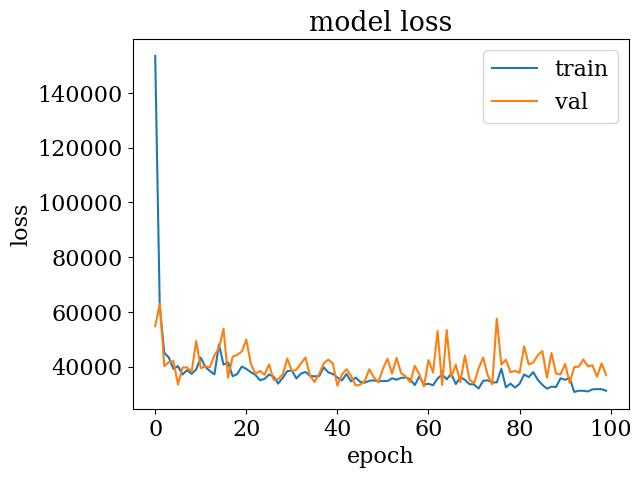

In [241]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()


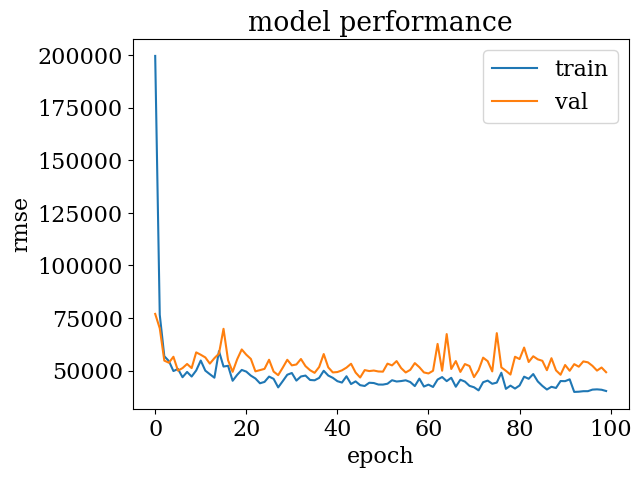

In [242]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [243]:
model.evaluate(test_dataset)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 43930.3906 - root_mean_squared_error: 53523.8242 


[43606.5078125, 52207.80859375]

In [244]:
print(X_test[0])

tf.Tensor(
[4.00000e+00 1.22813e+05 2.00000e+00 5.00000e+00 1.20000e+01 1.69000e+02
 7.00000e+01 1.21000e+02], shape=(8,), dtype=float32)


In [245]:
print(model.predict(tf.expand_dims(X_test[0], axis = 0)))
print(Y_test[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
[[170246.58]]
tf.Tensor([245796.], shape=(1,), dtype=float32)


In [246]:
print(Y_test[:,0])

tf.Tensor(
[245796.  172234.5 393351.  276430.  140596.  253867.  530759.  421679.5
  97969.  312164.5 206591.  508328.5 312454.5 392097.5 312323.5 322951.5
 133006.5 188131.5 293875.5 382241.  520659.5 100927.  237954.   28226.5
 313095.5 528794.   53040.  344539.  337257.  441395.5 448905.5 503307.5
 377108.5 456554.5 179077.  206678.  377507.   87769.  333672.  200794.5
 281037.5 427496.5 329538.5 221781.  274650.  155719.  198511.5 287093.5
 377706.5 539377.  230797.  224359.5 397183.  319728.  250955.  401011.5
  77277.  462397.5 120583.5 288926.  244295.5 331263.5 183465.5 275781.
  71314.  158951.5 296829.  499121.  212553.5 370175.  403886.5 301591.
 288556.5 272816.5 124183.5 475984.5 332478.5 344820.5 108894.  261732.
 509506.5 496671.  486699.  337917.  207352.5 150074.  315542.5 132159.
 467471.5 233139.  408405.5 306660.  307096.  444625.  245594.5 335093.5
 303419.  206999.5 187009.  114860. ], shape=(100,), dtype=float32)


In [247]:
Y_true = list(Y_test[:,0].numpy())
Y_pred = list(model.predict(X_test)[:,0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


In [248]:
ind = np.arange(100)
print(type(Y_pred[0]))
print(type(float(400000)))
print(type(np.float32(400000)))

<class 'numpy.float32'>
<class 'float'>
<class 'numpy.float32'>


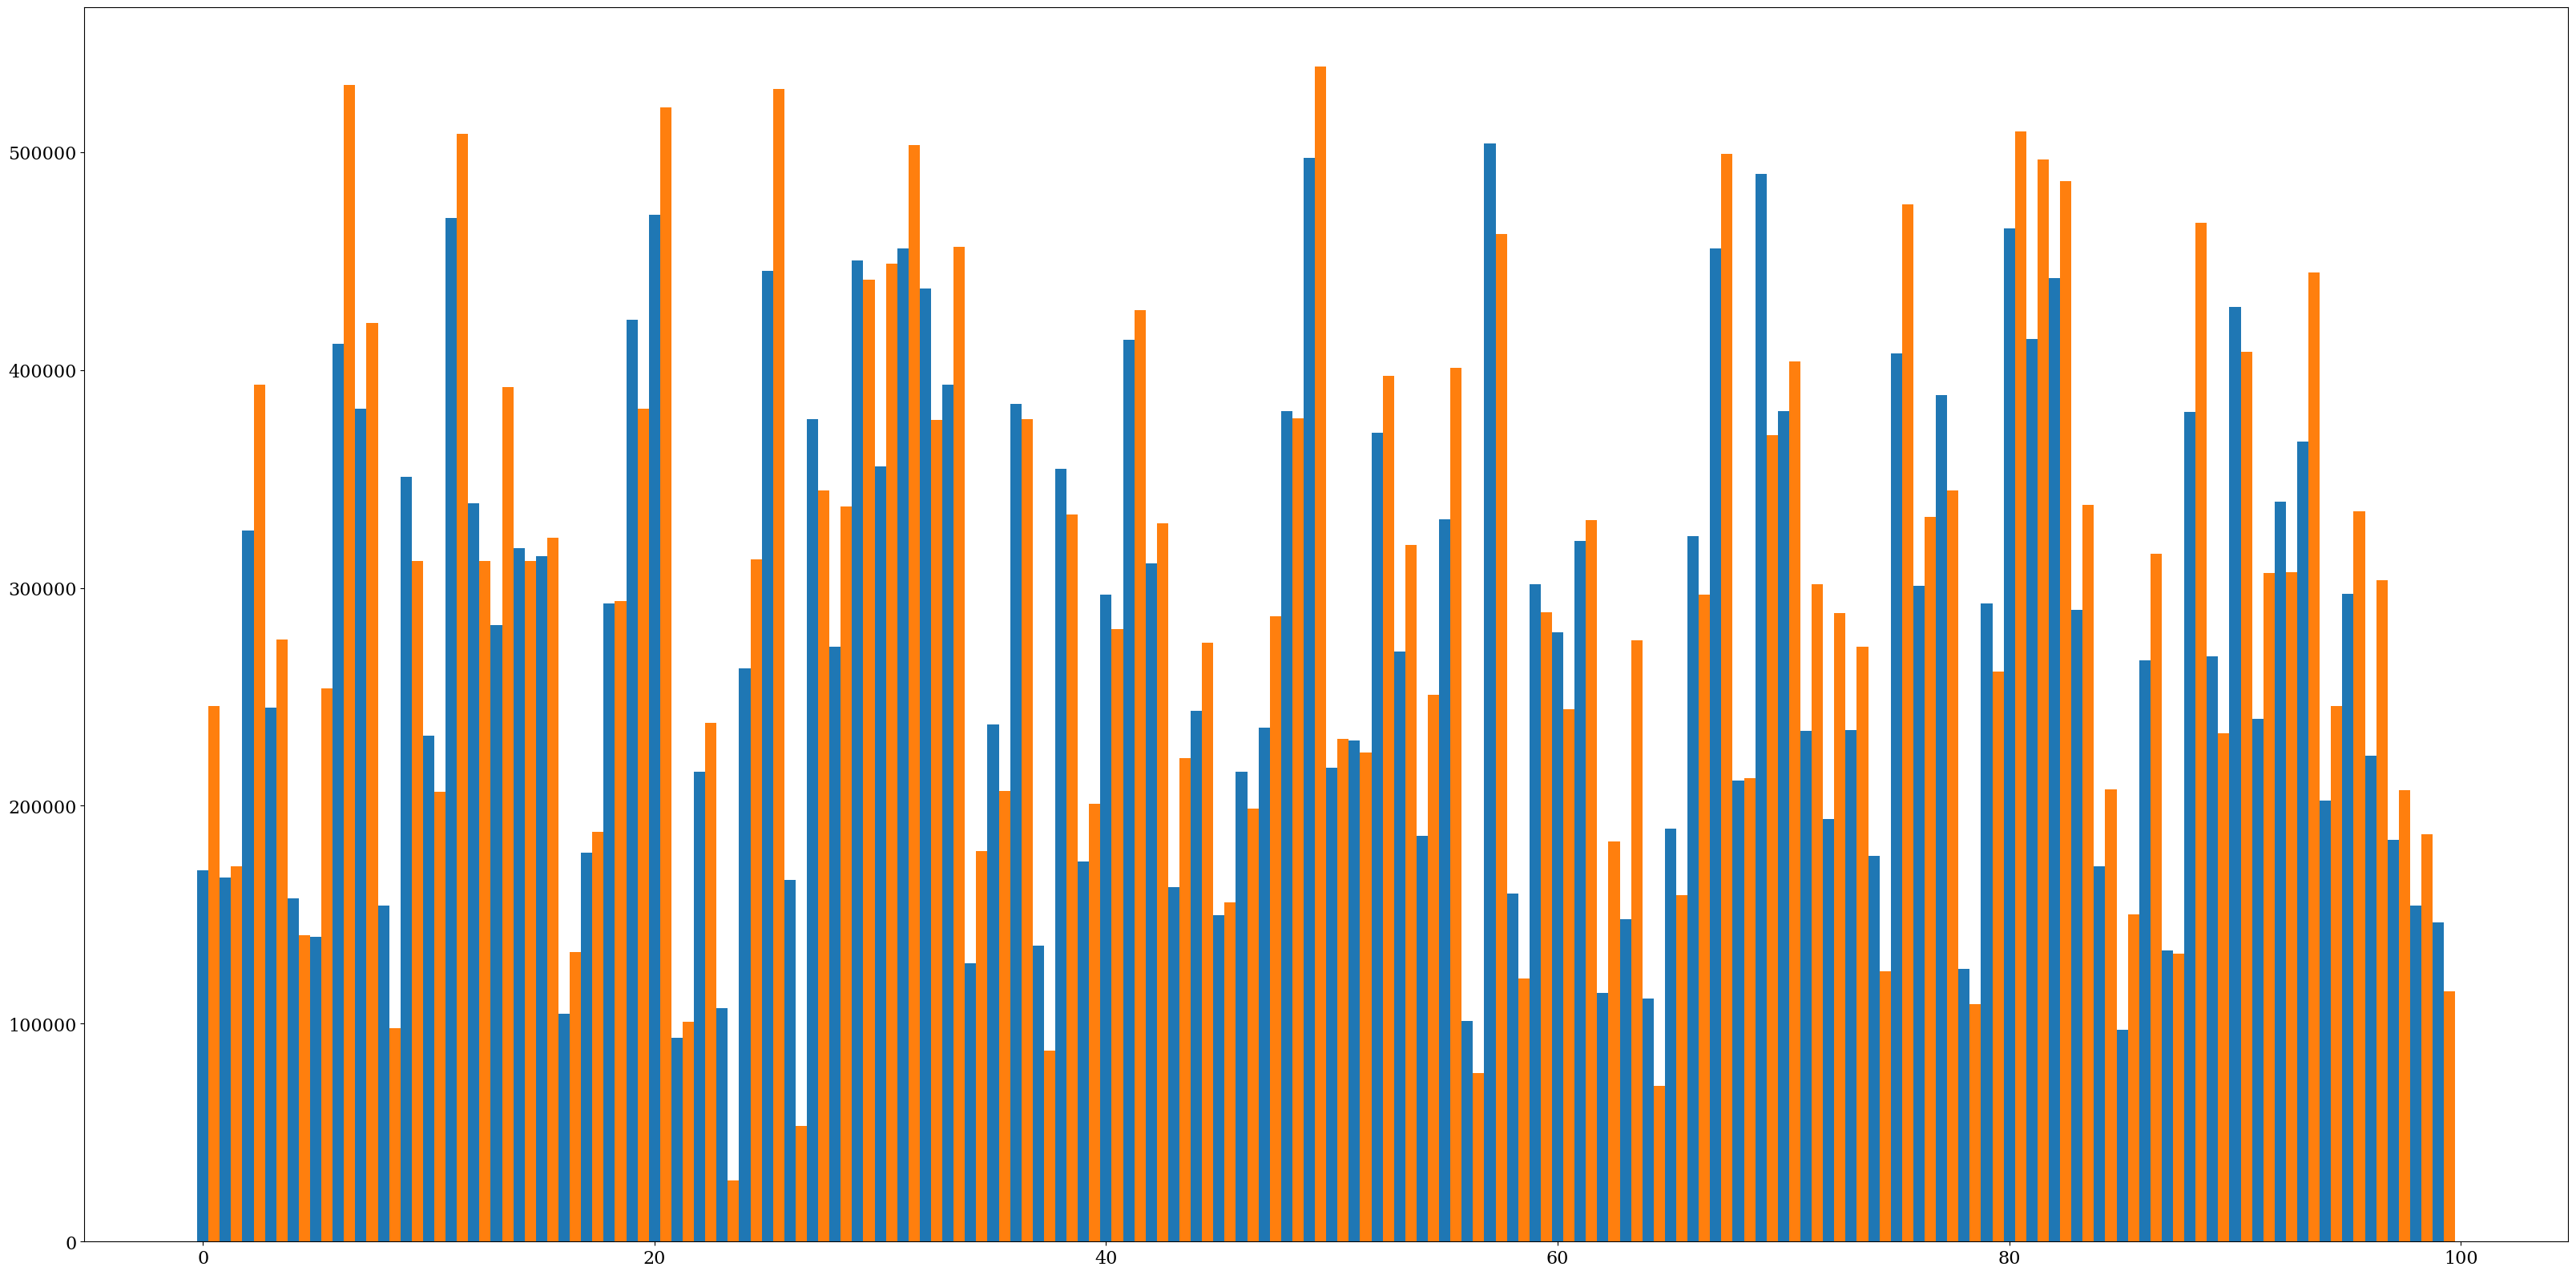

In [249]:
ind = np.arange(100)
plt.figure(figsize=(40,20))
width = 0.5

plt.bar(ind, Y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, Y_true, width, label='Actual Car Price')
plt.show()